In [1]:
import numpy as np
from typing import Dict

In [2]:
class MonteCarloAgent:
    def __init__(self, epsilon, all_possible_states):
        self.epsilon = epsilon
        self.q_values = {}
        self.returns = {}
        self.all_possible_states = all_possible_states


    def to_serializable(self):
        return {
            'epsilon': self.epsilon,
            'q_values': {str(k): v for k, v in self.q_values.items()},
            'returns': self.returns,
            'all_possible_states': self.all_possible_states,
        }
    def initialize_q_values(self):
        for state in self.all_possible_states:
            state_str = tuple(state.board.flatten())
            valid_moves = state.get_valid_moves()
            self.q_values[state_str] = np.zeros(len(valid_moves)).tolist()

    def epsilon_greedy_policy(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(state.get_valid_moves()))
        state_str = tuple(state.board.flatten())
        action_values = self.q_values.get(state_str, np.zeros(len(state.get_valid_moves())))#.tolist()
        return np.argmax(action_values)

    def train_episode(self, env):
        episode_data = []
        episode_returns = []
        
        while not env.is_game_over():
            if env.current_player == 1:
                action = self.epsilon_greedy_policy(env)
            else:
                action = np.random.choice(len(env.get_valid_moves()))
            env.make_move(*env.get_valid_moves()[action])

        state_str = tuple(env.board.flatten())
        episode_data.append((state_str, self.q_values[state_str]))

        for state_str, q_values in episode_data:
            for action, value in enumerate(q_values):
                self.q_values[state_str][action] = sum(
                    episode_returns[i]
                    for i in range(len(episode_returns))
                    if state_str == episode_data[i][0]
                    and episode_data[i][1][action] == value
                )

        return self.q_values, self.returns

    def train(self, episodes):
        for episode in range(episodes):
            self.train_episode(TicTacToe(random.choice([1,2])))
        # Test your training logic...
        
    def test(self):
        wins = 0
        draws = 0
        for _ in range(10000):
            env = TicTacToe(random.choice([1, 2]))
            while not env.is_game_over():
                if env.current_player == 1:
                    action = self.epsilon_greedy_policy(env)
                else:
                    action = np.random.choice(len(env.get_valid_moves()))
                env.make_move(*env.get_valid_moves()[action])

            if env.winner == 1:
                wins += 1
            elif env.winner == 0:
                draws += 1
    
        print(f"Agent won {wins} out of 10,000 games.")
        print(f"Draws: {draws}")

class SuperCarloAgent(MonteCarloAgent):
    def __init__(self,q_values:Dict,epsilon: float):
        self.q_values = q_values
        self.epsilon = epsilon
    def to_serializable(self):
        return {
            'q_values': {str(k): v for k, v in self.q_values.items()},
            'epsilon': self.epsilon
        }
    

In [3]:
import pickle as pkl
import pandas as pd 

In [4]:
with open("../runs/games-40000_learning_rate-0.1_12-23-2023_02-02-19/latest_overall_results_40000_lr_0.1.pkl","rb") as f:
    raw_test_data = pkl.load(f)

In [5]:
with open("../runs/games-40000_learning_rate-0.1_12-23-2023_02-02-19/Combination_super_carlo_40000_lr_0.1.pkl","rb") as f:
    mc_model = pkl.load(f)

In [6]:
mc_model.q_values

{(0, 0, 0, 0, 0, 0, 0, 0, 0): array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 0, 1): array([0., 0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 0, 2): array([0., 0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 1, 0): array([0., 0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 1, 1): array([0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 1, 2): array([0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 2, 0): array([0., 0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 2, 1): array([0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 0, 2, 2): array([0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 1, 0, 0): array([0., 0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 1, 0, 1): array([0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 1, 0, 2): array([0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 1, 1, 0): array([0., 0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 1, 1, 1): array([0., 0., 0., 0., 0., 0.]),
 (0, 0, 0, 0, 0, 0, 1, 1, 2): array([0

In [7]:
q_val_df = pd.DataFrame(mc_model.q_values.values())


In [9]:
list_lengths = [len(x) for x in mc_model.q_values.values()]

In [14]:
ll_df = pd.DataFrame(list_lengths,columns=["length"])

array([[<Axes: title={'center': 'length'}>]], dtype=object)

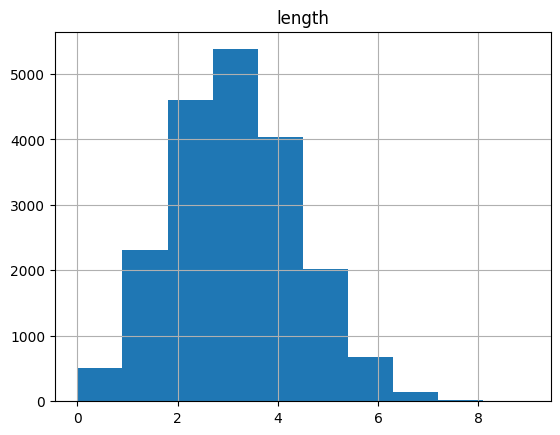

In [15]:
ll_df.hist()

In [45]:
q_val_df[q_val_df.isna().sum(axis=1)==0]

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
raw_test_data

{10000: (0.1, 3791, 5255),
 20000: (0.1, 3762, 5283),
 30000: (0.1, 3766, 5253),
 40000: (0.1, 3708, 5333)}